In [56]:
import pandas as pd
df2 = pd.read_csv("ee_bp19.csv")
df1= pd.read_csv("ee_bp24.csv")

Text(0.5, 1.0, 'Méthode du coude')

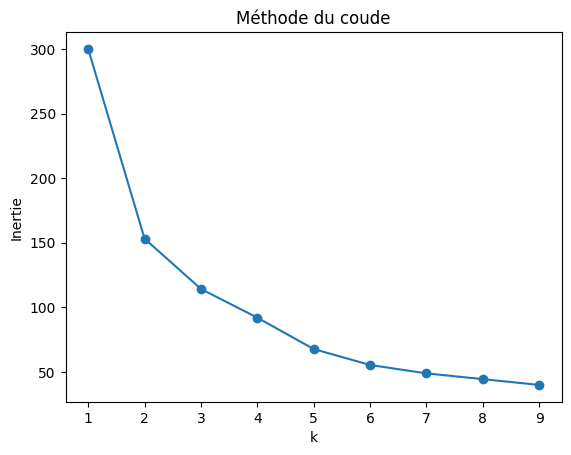

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df2[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []

for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertie")
plt.title("Méthode du coude")


In [12]:
k =3
km = KMeans(n_clusters=k, random_state=42)
df2["cluster"] = km.fit_predict(X_scaled)
df2.groupby("cluster")[["G","C","D"]].mean()

,G,C,D
cluster,,,
0,0.302069,0.376043,0.321889
1,0.226460,0.290782,0.482758
2,0.285839,0.306272,0.407889


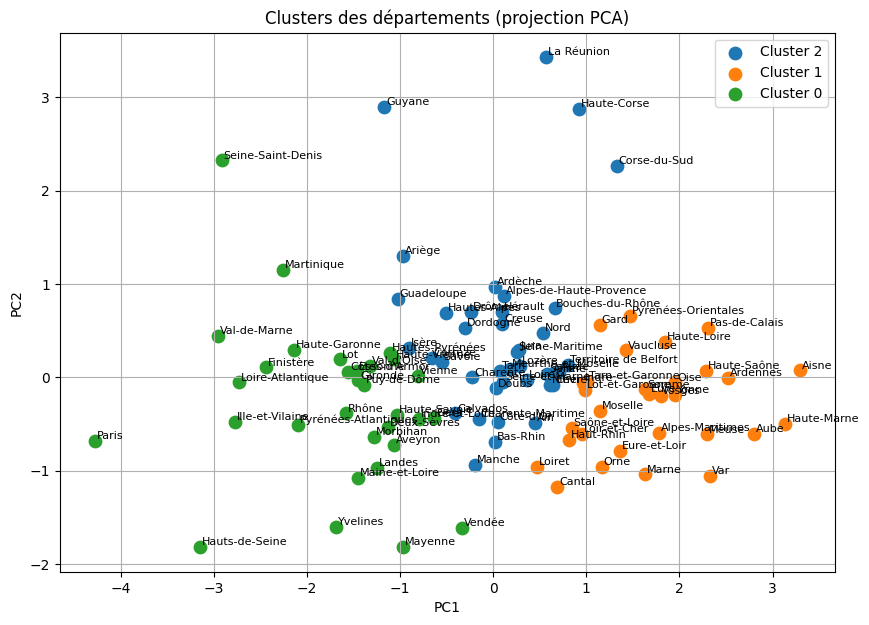

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df2["PC1"] = X_pca[:, 0]
df2["PC2"] = X_pca[:, 1]

# Visualisation 
plt.figure(figsize=(10, 7))
for cluster in df2["cluster"].unique():
    subset = df2[df2["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df2)):
    plt.text(df2["PC1"][i] + 0.02, df2["PC2"][i] + 0.02, df2["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les scores des partis (regroupés en trois blocs : gauche, centre et droite) met en évidence trois profils électoraux distincts.
Le cluster 1 se caractérise par une nette domination du bloc de droite (48 %), ce qui renvoie à des départements plus conservateurs et davantage orientés vers les partis souverainistes ou libéraux-conservateurs.
Le cluster 2 montre également un avantage de la droite (41 %), mais dans une mesure moins marquée, suggérant un profil centre-droit modéré.
Enfin, le cluster 0 présente un équilibre gauche/droite, mais avec une domination du centre (38 %)

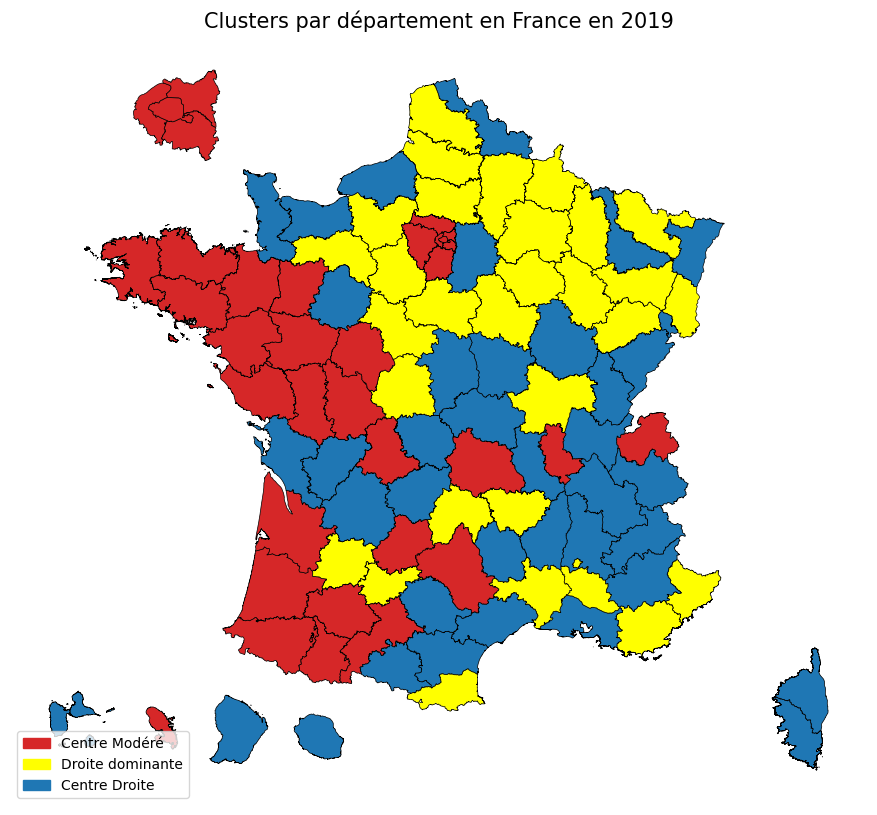

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df2[["Dep", "cluster"]]
    
departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Centre Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2019', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

In [26]:
url = "https://www.data.gouv.fr/api/1/datasets/r/500d1954-9849-479b-9aac-85435c6d422f"
# Lecture avec encodage adapté
chom = pd.read_excel(url, engine='openpyxl', header = 5, usecols=[0,1,7,12],  #[0,1,7,10,12]
 nrows=101, sheet_name="Moyenne annuelle").rename(columns = {"Unnamed: 1": "Dep",
2019: "chom19", 2024: "chom24"}).drop(columns=["Département"]).dropna()

dff2= df2.iloc[:,:5].merge(chom.iloc[:,:-1], on='Dep')
dff2['Majority_Leaning'] = dff2[['G', 'C', 'D']].idxmax(axis=1)
print(dff2.groupby('Majority_Leaning')['chom19'].mean())
print(dff2.groupby('cluster')['chom19'].mean())

Majority_Leaning
C     7.108696
D     8.586301
G    14.725000
Name: chom19, dtype: float64
cluster
0    7.580645
1    8.814167
2    8.817105
Name: chom19, dtype: float64


Text(0.5, 1.0, 'Méthode du coude')

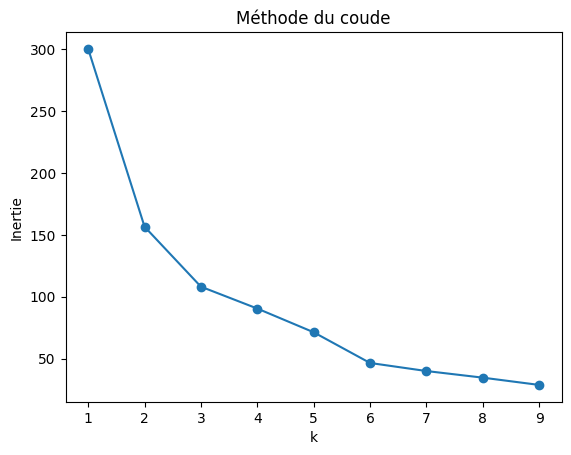

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df1[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []

for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertie")
plt.title("Méthode du coude")


In [63]:
k =3
km2 = KMeans(n_clusters=k, random_state=42)
df1["cluster"] = km2.fit_predict(X_scaled)
df1.groupby("cluster")[["G","C","D"]].mean()

,G,C,D
cluster,,,
0,0.255508,0.333745,0.410747
1,0.183825,0.251867,0.564309
2,0.227327,0.283594,0.489079


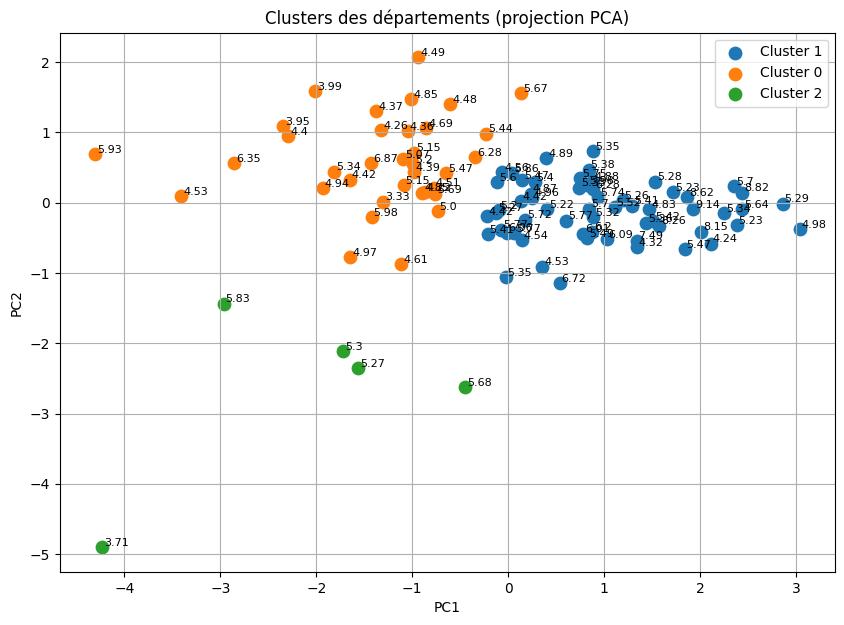

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df1["PC1"] = X_pca[:, 0]
df1["PC2"] = X_pca[:, 1]

# Visualisation 
plt.figure(figsize=(10, 7))
for cluster in df1["cluster"].unique():
    subset = df1[df1["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df1)):
    plt.text(df1["PC1"][i] + 0.02, df1["PC2"][i] + 0.02, df1["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les résultats électoraux permet d’identifier trois profils politiques distincts de départements : un cluster dominé par la droite, un cluster marqué par un vote de gauche plus élevé mais avec presence de la droite et un cluster intermédiaire à dominante centriste-droite.

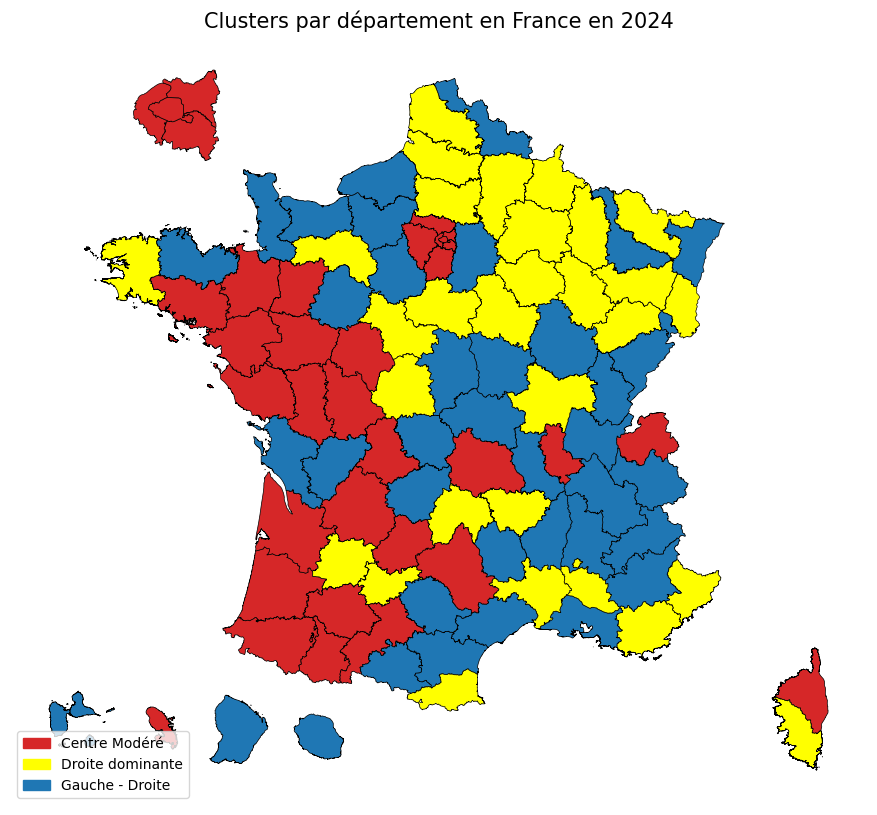

In [65]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df1[["Dep", "cluster"]]
    
departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Gauche - Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2024', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

In [64]:
dff1 = df1.iloc[:,:5].merge(chom.iloc[:, [0, 2]], on="Dep")

dff1['Majority_Leaning'] = dff1[['G', 'C', 'D']].idxmax(axis=1)
print(dff1.groupby('Majority_Leaning')['chom24'].mean())
print(dff1.groupby('cluster')['chom24'].mean())

Majority_Leaning
C    6.945833
D    7.353022
G    8.800000
Name: chom24, dtype: float64
cluster
0    6.682258
1    7.642500
2    7.683553
Name: chom24, dtype: float64


Interpretation à venir 

In [61]:
dff1

,Dep,G,C,D,chom24,Majority_Leaning
0,Ain,0.191325,0.277548,0.531127,5.600,D
1,Aisne,0.152445,0.199770,0.647786,10.500,D
2,Allier,0.205709,0.260076,0.534215,7.925,D
3,Alpes-de-Haute-Provence,0.237065,0.272583,0.490352,7.925,D
4,Hautes-Alpes,0.239572,0.313148,0.447279,6.225,D
...,...,...,...,...,...,...
94,Val-de-Marne,0.356643,0.313732,0.329625,7.275,G
95,Val-d'Oise,0.346725,0.258215,0.395060,7.975,D
96,Guadeloupe,0.258480,0.322985,0.418535,16.750,D
97,Martinique,0.313748,0.379122,0.307131,12.350,C


Pourquoi autant de vote à gauche?

La victoire massive de la droite s'explique par un vote de sanction contre Emmanuel Macron et une forte inquiétude sur le pouvoir d'achat. Le RN a réussi à sortir de ses zones habituelles pour convaincre de nouveaux électeurs comme les retraités et les cadres, tout en captant le sentiment d'abandon des habitants des zones rurales.

Conclusion au niveau du taux de chomage est la meme:
Plus on est exposé au chômage ou à la précarité, plus on a tendance à voter pour les extrêmes (droite ou gauche), tandis que ceux qui ont une situation stable votent davantage pour le centre.
En effet, Le vote pour la droite radicale est très fort chez les plus précaires et les personnes les moins satisfaites de leur vie. C’est souvent dans les zones où le chômage inquiète le plus que ce vote progresse.
Le vote pour la gauche est plus courant chez les jeunes une catégorie où le chômage est beaucoup plus élevé que la moyenne nationale.